## Data Analysis on ERCOT Electricity Data

### 1. Load Dataframe

In [46]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Load dataframe
ercot_df = pd.read_csv("clean_data/ERCOT_Electricity_Data.csv")

In [48]:
# Keep only the desired columns
desired_cols = ['Date', 'Hour', 'Price_Hub_Avg', 'Load_Total', 'Wind_SystemWide', 'Solar_SystemWide']
df = ercot_df[desired_cols]

# Drop any missing
df = df.dropna()

# Convert date into a datetime object
df.loc[:, 'Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

# Preview dataframe
df.head()

,Date,Hour,Price_Hub_Avg,Load_Total,Wind_SystemWide,Solar_SystemWide
0,2025-02-20 00:00:00,1,94.55,72951.48,9887.48,0.30
1,2025-02-20 00:00:00,2,88.75,72418.95,9639.18,0.37
2,2025-02-20 00:00:00,3,94.00,72298.62,10068.85,0.44
3,2025-02-20 00:00:00,4,95.07,72716.90,10606.27,0.50
4,2025-02-20 00:00:00,5,109.71,74012.06,11000.20,0.58


In [49]:
df.describe()

,Hour,Price_Hub_Avg,Load_Total,Wind_SystemWide,Solar_SystemWide
count,742.000000,742.000000,742.000000,742.000000,742.000000
mean,11.524259,34.353854,48854.606065,15207.554515,6851.032588
std,6.920316,48.000754,7218.532395,7655.592265,8526.714052
min,0.000000,0.200000,39037.970000,2048.640000,0.010000
25%,6.000000,17.477500,44510.047500,7671.020000,0.490000
50%,12.000000,26.755000,47627.425000,16402.535000,314.185000
75%,17.750000,38.560000,50249.790000,22360.510000,14366.662500
max,23.000000,813.120000,80379.090000,28264.170000,26156.670000


Add a 'week' column to the dataframe

In [50]:
# Add 'week' column to dataframe
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') # make sure it's datetime obj
df['Week'] = df['Date'].dt.isocalendar().week
df.head()

,Date,Hour,Price_Hub_Avg,Load_Total,Wind_SystemWide,Solar_SystemWide,Week
0,2025-02-20,1,94.55,72951.48,9887.48,0.30,8
1,2025-02-20,2,88.75,72418.95,9639.18,0.37,8
2,2025-02-20,3,94.00,72298.62,10068.85,0.44,8
3,2025-02-20,4,95.07,72716.90,10606.27,0.50,8
4,2025-02-20,5,109.71,74012.06,11000.20,0.58,8


In [51]:
# View the values of 'week'
df['Week'].unique()

<IntegerArray>
[8, 9, 10, 11, 12]
Length: 5, dtype: UInt32

#### Variable Descriptions
**Date:** ranges from the past 30 days (yyyy-mm-dd)

**Hour:** ranges from 1.0 (1am) to 12.0 (12am)

**Price_Hub_Avg:** average electrical bus price across ERCOT system ($/MWh)

**Load_Total:** total electricity load (MW) across ERCOT system

**WGen_System:** total wind generation (MW) across ERCOT system

**SGen_System:** total solar generation (MW) across ERCOT system

### 2. Visualizing the Individual Features

##### Average Electricity Price vs. Time of Day, by Week

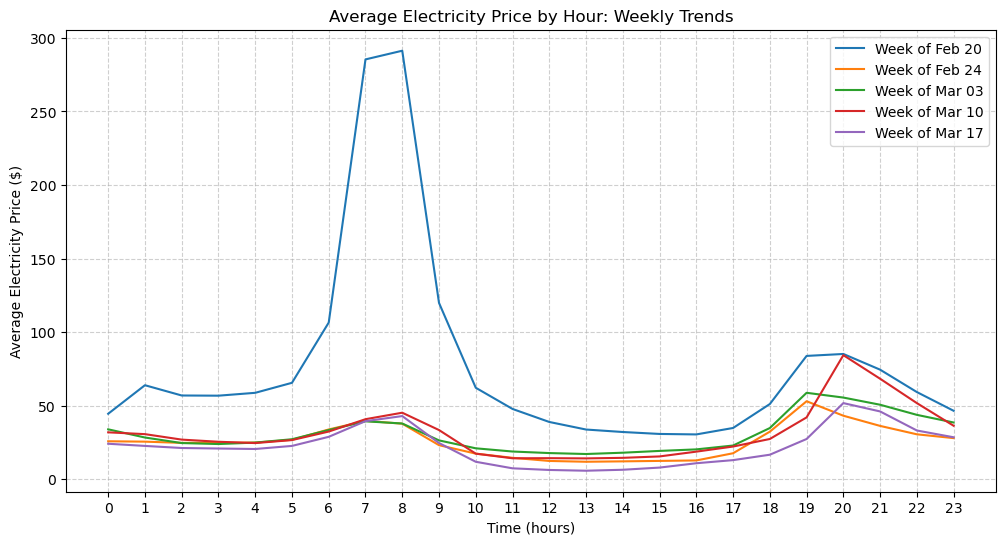

In [52]:
# Group average price by week and hour
weekly_price_avg = df.groupby(['Week', 'Hour'])['Price_Hub_Avg'].mean().reset_index()

# Dictionary: week of
week_of = df.groupby('Week')['Date'].min().dt.strftime('%b %d').to_dict()

# Plot weekly average price by time of day
plt.figure(figsize=(12, 6))

# Loop over each week and plot
for week in weekly_price_avg['Week'].unique():
    one_week = weekly_price_avg[weekly_price_avg['Week'] == week]
    lab = f'Week of {week_of[week]}'
    plt.plot(one_week['Hour'], one_week['Price_Hub_Avg'], label=lab)

plt.title('Average Electricity Price by Hour: Weekly Trends')
plt.xlabel('Time (hours)')
plt.ylabel('Average Electricity Price ($)')
plt.xticks(range(24))
plt.grid(linestyle='--', alpha=0.6)
plt.legend()
plt.show()

##### Average Grid Load vs. Time of Day, by Week

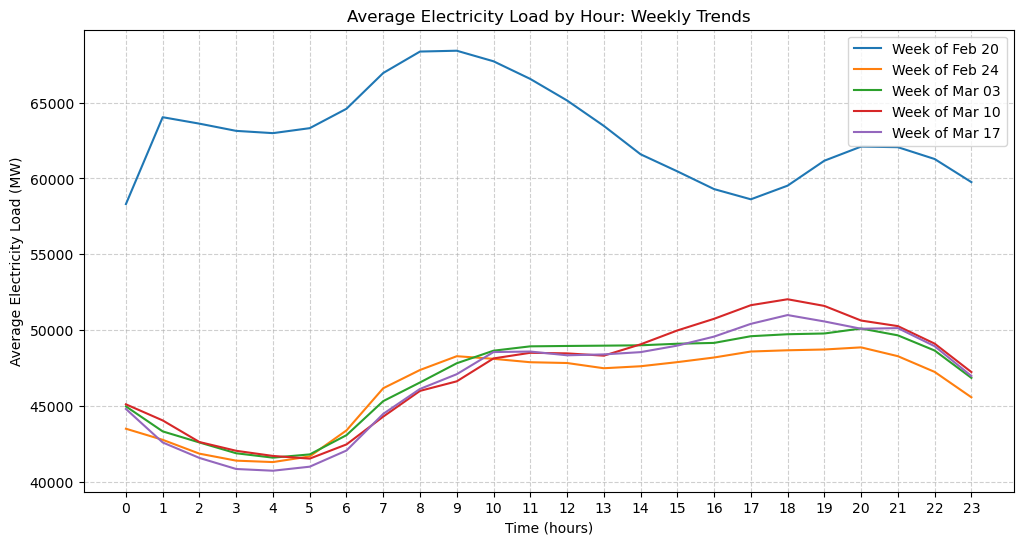

In [53]:
# Group average load by week and hour
weekly_load_avg = df.groupby(['Week', 'Hour'])['Load_Total'].mean().reset_index()

# Plot weekly average load by time of day
plt.figure(figsize=(12, 6))

# Loop over each week and plot
for week in weekly_load_avg['Week'].unique():
    one_week = weekly_load_avg[weekly_load_avg['Week'] == week]
    lab = f'Week of {week_of[week]}'
    plt.plot(one_week['Hour'], one_week['Load_Total'], label=lab)

plt.title('Average Electricity Load by Hour: Weekly Trends')
plt.xlabel('Time (hours)')
plt.ylabel('Average Electricity Load (MW)')
plt.xticks(range(24))
plt.grid(linestyle='--', alpha=0.6)
plt.legend()
plt.show()

##### Comparing the Average Grid Load to Electricity Price over Time

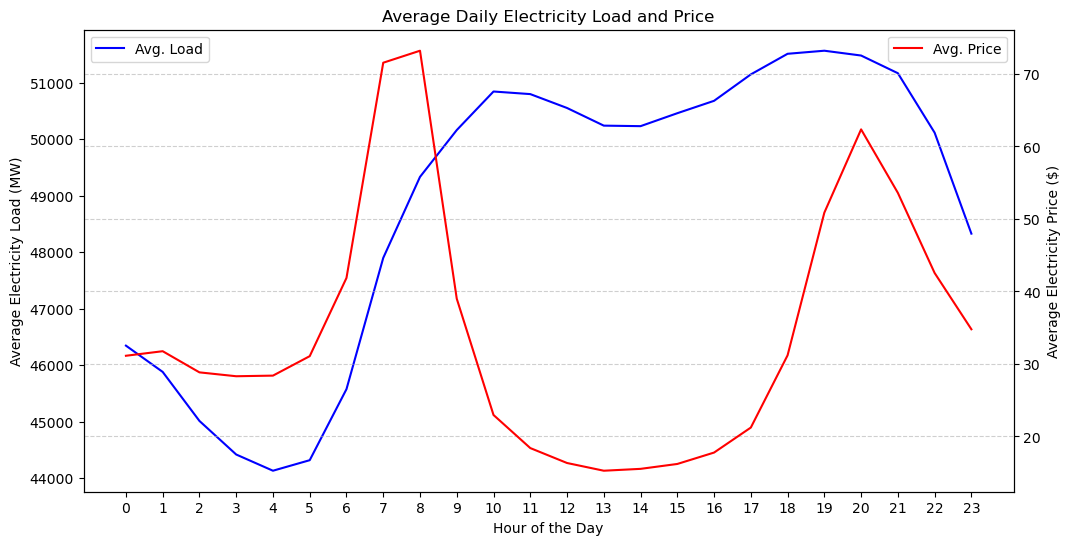

In [54]:
# Group data by hour and calculate the average
average_data = df.groupby('Hour').agg({'Load_Total': 'mean', 'Price_Hub_Avg': 'mean'}).reset_index()

# Plot average load
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(average_data['Hour'], average_data['Load_Total'], color='blue', label='Avg. Load')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Average Electricity Load (MW)')

# Plot average price
ax2 = ax1.twinx()  
ax2.plot(average_data['Hour'], average_data['Price_Hub_Avg'], color='red', label='Avg. Price')
ax2.set_ylabel('Average Electricity Price ($)')

# Add annotations
plt.title('Average Daily Electricity Load and Price')
ax1.legend(loc='upper left')
ax2.legend()
plt.xticks(range(24))
plt.grid(linestyle='--', alpha=0.6)
plt.show()

##### Comparing the Average Wind Generation to Solar Generation Over Time

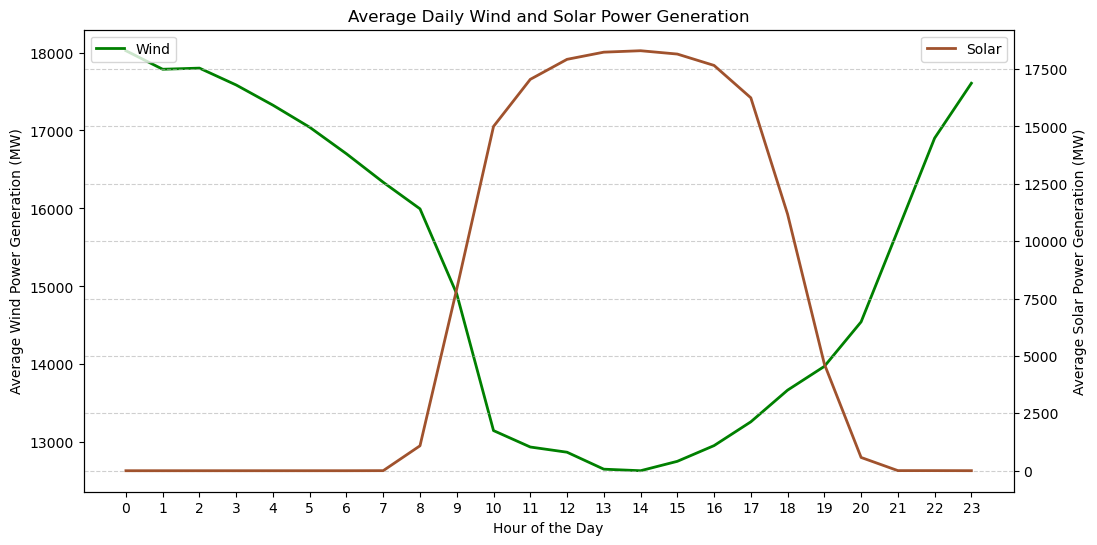

In [55]:
# Group data by hour and calculate the average
average_data = df.groupby('Hour').agg({'Wind_SystemWide': 'mean', 'Solar_SystemWide': 'mean'}).reset_index()

# Plot average load
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(average_data['Hour'], average_data['Wind_SystemWide'], color='green', label='Wind', linewidth=2)
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Average Wind Power Generation (MW)')

# Plot average price
ax2 = ax1.twinx()
ax2.plot(average_data['Hour'], average_data['Solar_SystemWide'], color='sienna', label='Solar', linewidth=2)
ax2.set_ylabel('Average Solar Power Generation (MW)')

# Add title and grid
plt.title('Average Daily Wind and Solar Power Generation')
ax1.legend(loc='upper left')
ax2.legend()
plt.xticks(range(24))
plt.grid(linestyle='--', alpha=0.6)
plt.show()

##### Wind Power Generation over 30 Days

In [56]:
# First combine date and hour into a datetime object
df_dt = df.copy()
df_dt['Date_Time'] = df_dt.apply(lambda x: pd.Timestamp(year=x['Date'].year, 
                                                         month=x['Date'].month, 
                                                         day=x['Date'].day, 
                                                         hour=x['Hour']), axis=1)

# Make sure df is sorted by datetime
df_dt = df_dt.sort_values(by='Date_Time')
df_dt.head()

,Date,Hour,Price_Hub_Avg,Load_Total,Wind_SystemWide,Solar_SystemWide,Week,Date_Time
23,2025-02-20,0,60.23,66975.95,7339.41,0.31,8,2025-02-20 00:00:00
0,2025-02-20,1,94.55,72951.48,9887.48,0.30,8,2025-02-20 01:00:00
1,2025-02-20,2,88.75,72418.95,9639.18,0.37,8,2025-02-20 02:00:00
2,2025-02-20,3,94.00,72298.62,10068.85,0.44,8,2025-02-20 03:00:00
3,2025-02-20,4,95.07,72716.90,10606.27,0.50,8,2025-02-20 04:00:00


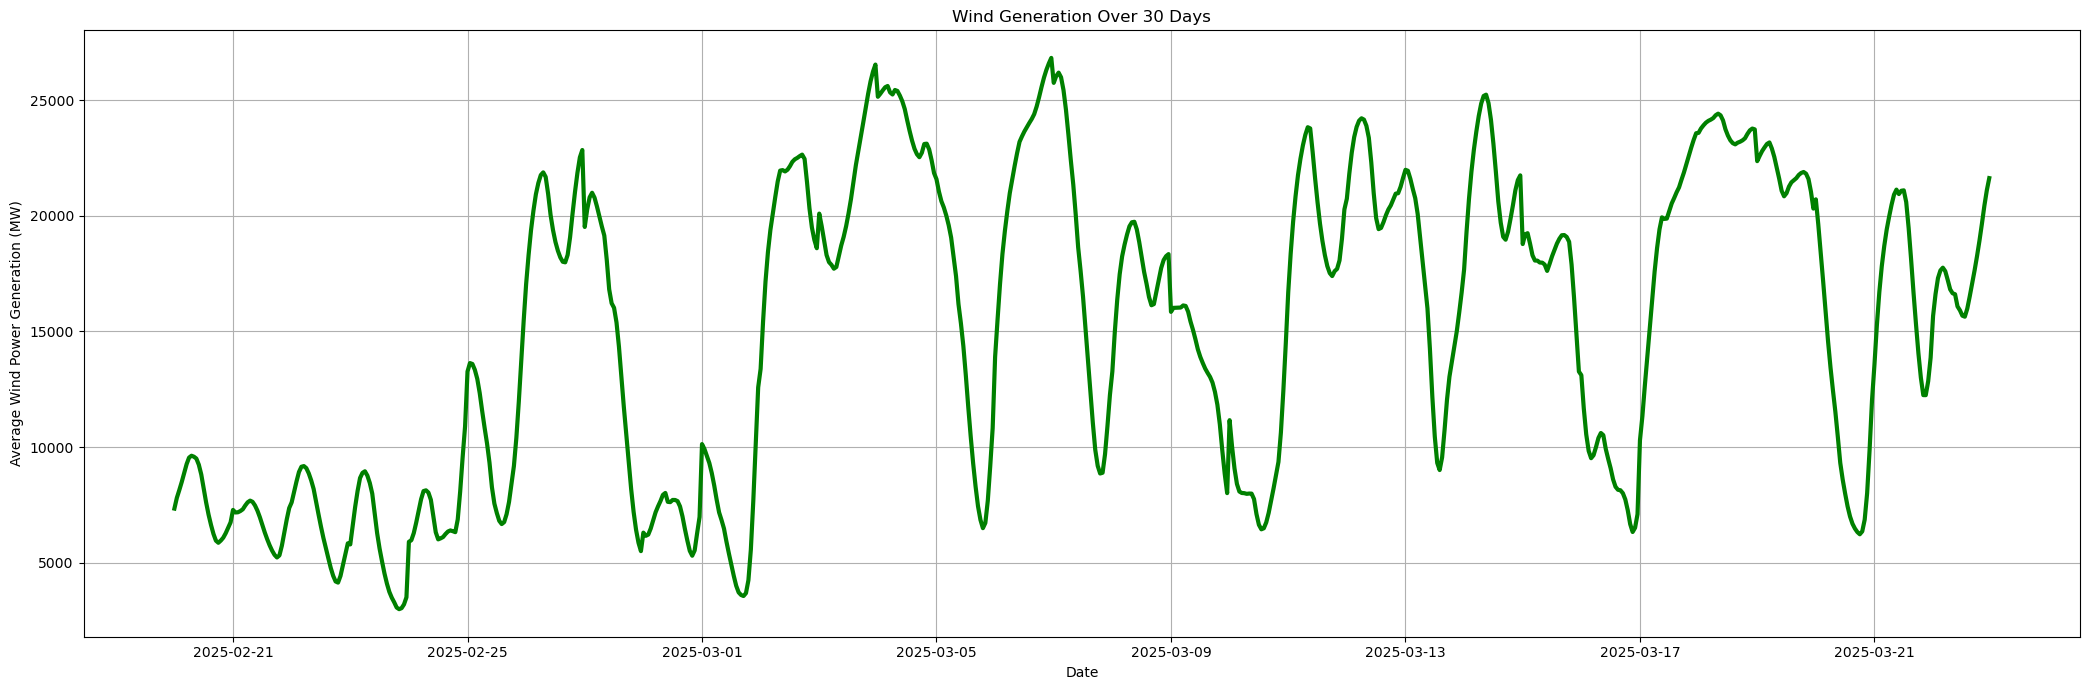

In [57]:
# Attempt to smooth data via exponential moving avg
df_smooth = df_dt.copy()
df_smooth['Wind_SystemWide_Smooth'] = df_dt['Wind_SystemWide'].ewm(span=10, adjust=False).mean()

# Plot average wind generation
plt.figure(figsize=(21, 7))
plt.plot(df_smooth['Date_Time'], df_smooth['Wind_SystemWide_Smooth'], color='green', linewidth=3)
plt.title('Wind Generation Over 30 Days')
plt.xlabel('Date')
plt.ylabel('Average Wind Power Generation (MW)')
plt.grid()
plt.tight_layout()
plt.show()

##### Maximum vs. Average Solar Power Generation over 30 days

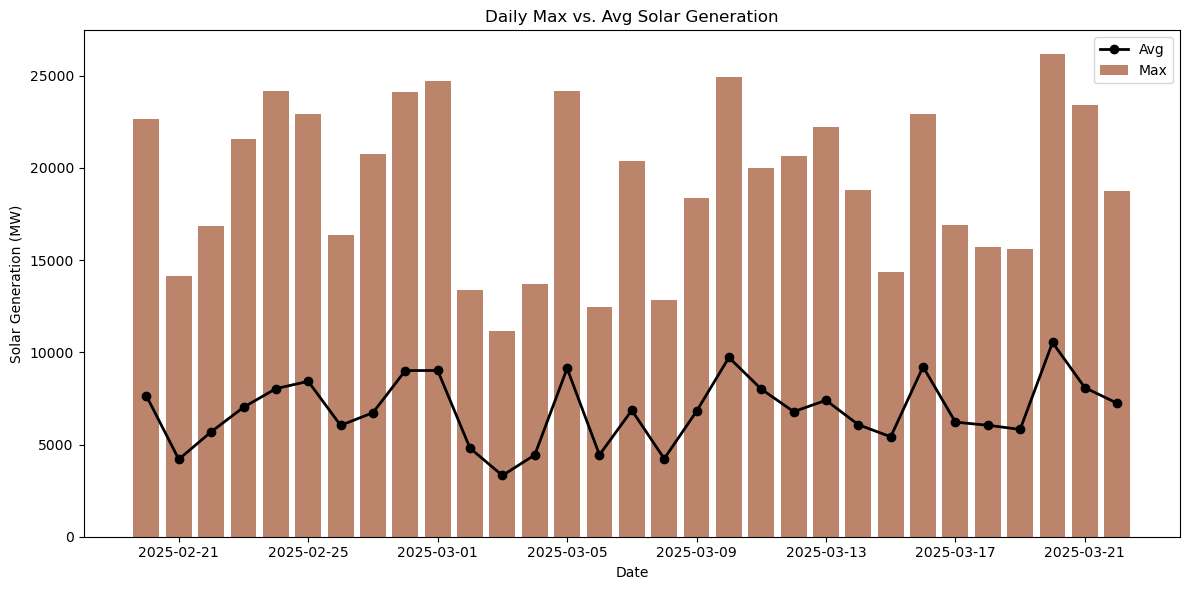

In [58]:
# Group solar generation by date and calculate max & mean generation
daily_solar = df.groupby('Date')['Solar_SystemWide'].agg(['max', 'mean']).reset_index()
daily_solar = daily_solar.sort_values('Date')

# Initalize figure
plt.figure(figsize=(12, 6))

# Barplot for maximum solar generation
plt.bar(daily_solar['Date'], daily_solar['max'], label='Max', color='sienna', alpha=0.7)

# Plot line for average solar generation
plt.plot(daily_solar['Date'], daily_solar['mean'], label='Avg', color='black', marker='o', linewidth=2)

plt.title('Daily Max vs. Avg Solar Generation')
plt.xlabel('Date')
plt.ylabel('Solar Generation (MW)')
plt.legend()
plt.tight_layout()
plt.show()

##### Visualize Patterns in Electricity Prices by Day & Time with a Heatmap

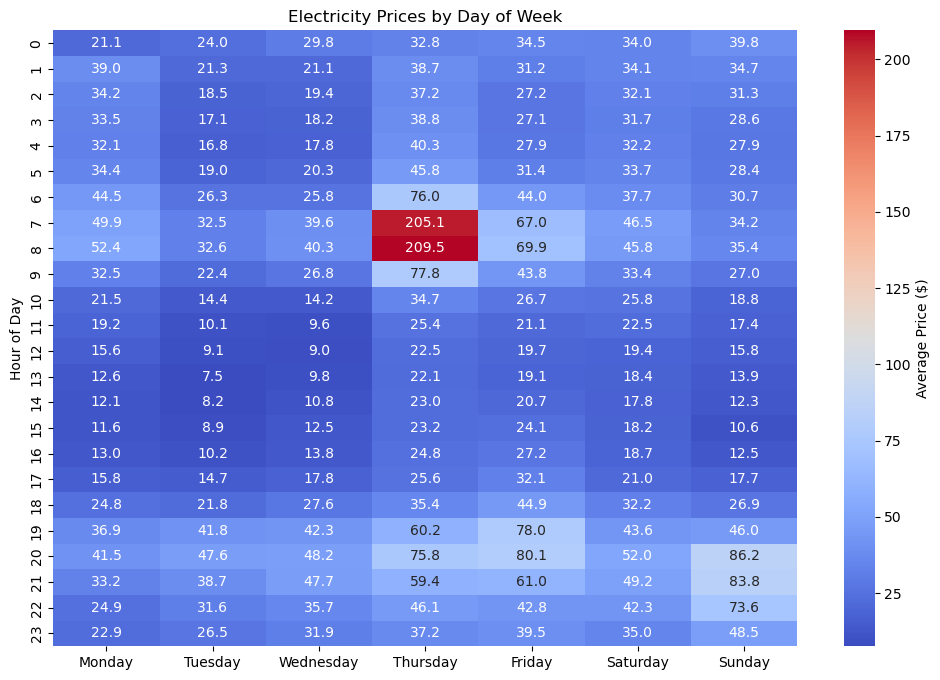

In [59]:
# Create columns conveying the day (name) and if it's a weekend or not
df['Day'] = df['Date'].dt.day_name()
df['is_weekend'] = df['Date'].dt.dayofweek >= 5

# Make heatmap with pivot table
price_heatmap = df.pivot_table(index='Hour', columns='Day', values='Price_Hub_Avg', aggfunc='mean')

# Make sure columns start with Monday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_heatmap = price_heatmap[day_order]

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(price_heatmap, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Average Price ($)'})
plt.title('Electricity Prices by Day of Week')
plt.xlabel('')
plt.ylabel('Hour of Day')
plt.yticks()
plt.show()

##### Visualize Patterns in Electricity Prices by Weekend or Not with a Heatmap

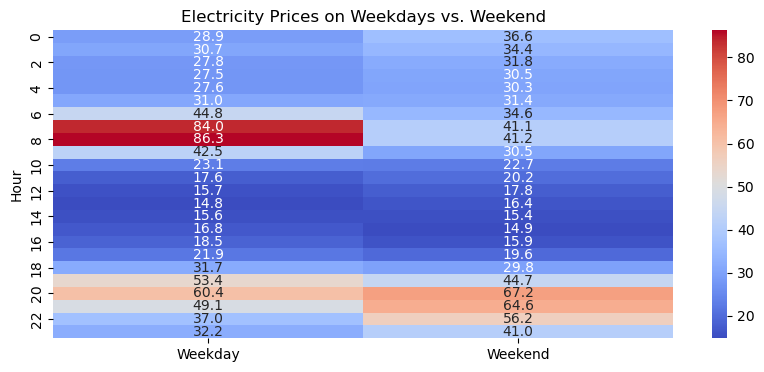

In [60]:
# Group by weekend or not
weekend_price_heatmap = df.pivot_table(index='Hour', columns='is_weekend', values='Price_Hub_Avg', 
                                       aggfunc='mean').rename(columns={False: 'Weekday', True: 'Weekend'})

# Plot
plt.figure(figsize=(10, 4))
sns.heatmap(weekend_price_heatmap, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Electricity Prices on Weekdays vs. Weekend')
plt.xlabel('')
plt.show()

### Build a predictive model that forecasts the next week of prices
*Gradient boosted Random Forest Regressor*

In [61]:
# Import Libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Preprocessing & Feature Engineering

In [66]:
# Only work with weeks 2, 3, and 4 of data since week 1 is an outlier
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') # make sure it's datetime obj
df_rf = df[df['Week'] != 8]

In [ ]:
# One-hot encode 'day'


In [67]:
# Create a lag feature
df_rf = df_rf.copy()
df_rf['Prev_Hour_Price'] = df_rf.groupby('Date')['Price_Hub_Avg'].shift(1)
df_rf.dropna(inplace=True)

# Create rolling price feature (3hr window)
df_rf['Rolling_Price_3hr'] = df_rf.groupby('Date')['Price_Hub_Avg'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Create rolling load feature (3hr window)
df_rf['Rolling_Load_3hr'] = df_rf.groupby('Date')['Load_Total'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Create a wind & solar generation ratio feature
df_rf['Wind_Solar_Ratio'] = df['Wind_SystemWide'] / df['Solar_SystemWide'] + 1e-6

df_rf.head()


,Date,Hour,Price_Hub_Avg,Load_Total,Wind_SystemWide,Solar_SystemWide,Week,Day,is_weekend,Prev_Hour_Price,Rolling_Price_3hr,Rolling_Load_3hr,Wind_Solar_Ratio
97,2025-02-24,2,36.12,46113.85,7660.41,0.51,9,Monday,False,37.67,36.120000,46113.850000,15020.411766
98,2025-02-24,3,36.26,46970.23,8788.54,0.56,9,Monday,False,36.12,36.190000,46542.040000,15693.821430
99,2025-02-24,4,34.52,47342.85,9469.33,0.59,9,Monday,False,36.26,35.633333,46808.976667,16049.711865
100,2025-02-24,5,35.59,48549.29,10051.02,0.64,9,Monday,False,34.52,35.456667,47620.790000,15704.718751
101,2025-02-24,6,44.58,50990.76,9683.09,0.61,9,Monday,False,35.59,38.230000,48960.966667,15873.918034


Select Features & Split Dataset

In [76]:
# Select features and target
X = df_rf.drop(['Price_Hub_Avg', 'Date', 'Week'], axis=1)
X = pd.get_dummies(X, columns=['Day']) # one-hot encode 'day'
y = df_rf['Price_Hub_Avg']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # train on older data, test on newer

In [77]:
# Train model
model = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [78]:
# Predict values and evaluate performance
y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

MAE: 4.15


A MAE of 4.15 indicates that the model's predictions are off by about $4.15 per megawatt-hour, on average. For a small dataset and limited features, the model is performing decently well. To improve upon the model, I'll look to add more features like weather data, historical data (the same weeks/days from years past), and more generation sources (particularly natural gas). 

Visualize Predictions against Actual Data

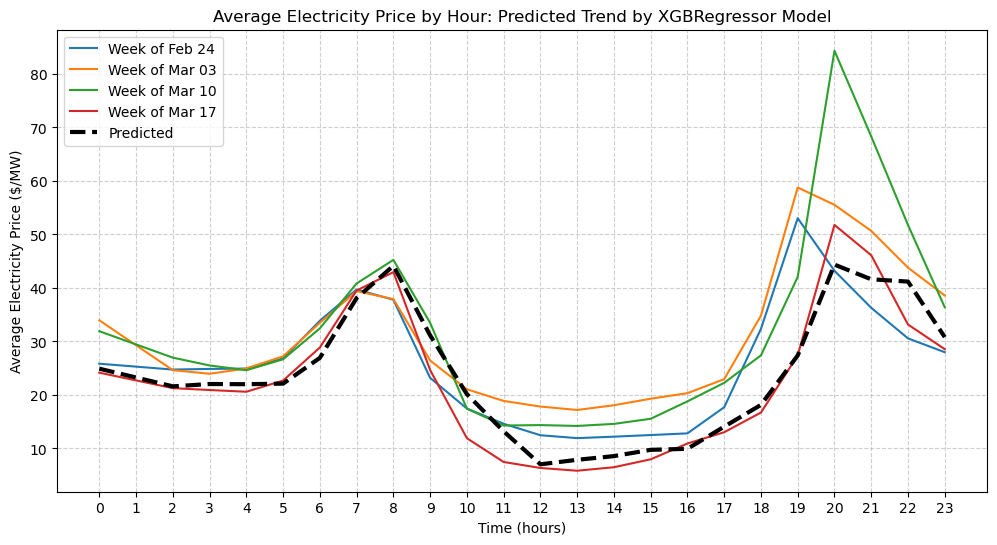

In [85]:
# Group average price by week and hour (excluding outlier week)
weekly_price_avg = df_rf.groupby(['Week', 'Hour'])['Price_Hub_Avg'].mean().reset_index()
weekly_price_avg = weekly_price_avg[weekly_price_avg['Week'] != 8]

# Dictionary: week of
week_of = df.groupby('Week')['Date'].min().dt.strftime('%b %d').to_dict()

# Plot weekly average price by time of day
plt.figure(figsize=(12, 6))

# Loop over each week and plot
for week in weekly_price_avg['Week'].unique():
    one_week = weekly_price_avg[weekly_price_avg['Week'] == week]
    lab = f'Week of {week_of[week]}'
    plt.plot(one_week['Hour'], one_week['Price_Hub_Avg'], label=lab)

# Create a DataFrame for test data with predictions
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = y_pred

# Group average predicted values by hour
pred_by_hour = results.groupby('Hour')[['Actual', 'Predicted']].mean().reset_index()

# Plot predicted electricity prices
plt.plot(pred_by_hour['Hour'], pred_by_hour['Predicted'], label='Predicted', color='black', linestyle='--', linewidth=3)

# Annotations
plt.title('Average Electricity Price by Hour: Predicted Trend by XGBRegressor Model')
plt.xlabel('Time (hours)')
plt.ylabel('Average Electricity Price ($/MW)')
plt.xticks(range(24))
plt.grid(linestyle='--', alpha=0.6)
plt.legend()
plt.show()